<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          font-size:90%;
              color:white;">
Context
</p>
</div>

“**Support Vector Machine**” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. 

However, it is mostly used in classification problems. 

In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. 

Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

![](https://miro.medium.com/max/1400/1*CS-OYdiRLCBMBiOpEURy0g.png)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          font-size:85%;
              color:white;">
Library Imports
</p>
</div>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.svm import SVC

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          font-size:85%;
              color:white;">
Loading Dataset
</p>
</div>

In [6]:
df=pd.read_csv('spam.csv')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          font-size:85%;
              color:white;">
Information about Dataset
</p>
</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.shape

(5572, 2)

In [9]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isna().sum()

Category    0
Message     0
dtype: int64

Text(0.5, 1.0, 'Pie chart')

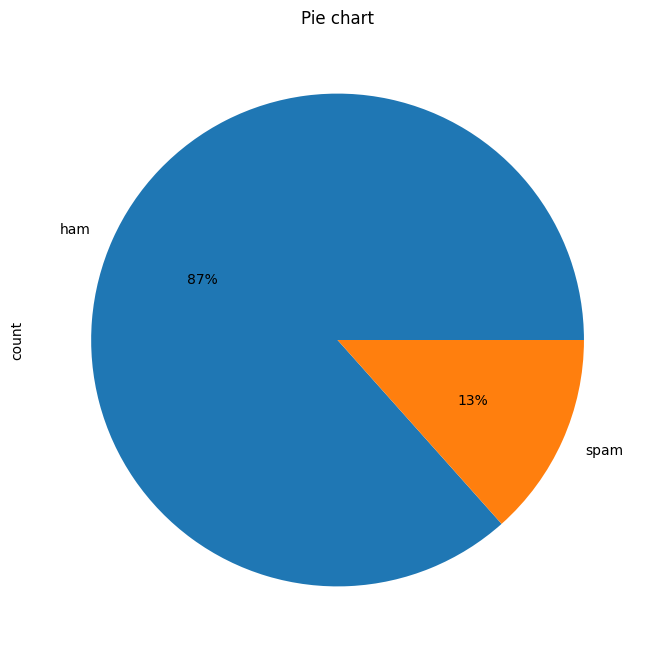

In [11]:
plt.figure(figsize = (8, 8))
df['Category'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Pie chart')

In [45]:
x = df['Message'].values
y = df['Category'].values

In [46]:
import pickle
with open('word2vec.pk', 'rb') as f:
    word_embeddings = pickle.load(f)
    
def generate_doc_embedding(texts, word_embeddings, feature_number=-1):
    mean_embedding = np.mean(list(word_embeddings.values()), axis=0)
    document_embeddings = []
    for text in texts:
        words = text.split()
        embedding_dim = len(mean_embedding)
        doc_embedding = np.zeros(embedding_dim)
        word_count = 0
        for word in words:
            if word in word_embeddings:
                doc_embedding += word_embeddings[word]
                word_count += 1
        if word_count > 0:
            doc_embedding /= word_count
        else:
            doc_embedding = mean_embedding
        document_embeddings.append(doc_embedding[:feature_number])
    return np.array(document_embeddings)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          font-size:85%;
              color:white;">
Train Test split
</p>
</div>

In [53]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state=0)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          font-size:85%;
              color:white;">
Converting String to Integer
</p>
</div>

In [48]:
cv = CountVectorizer() 
x_train = generate_doc_embedding(x_train, word_embeddings)
x_test = generate_doc_embedding(x_test, word_embeddings)

In [54]:
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [55]:
y_train

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align: center;
          font-size:85%;
              color:white;">
Applying SVM algorithm
</p>
</div>

In [56]:
model = SVC(random_state = 0)
model.fit(x_train, y_train)

SVC(random_state=0)

In [57]:
model.score(x_test,y_test)

0.9820627802690582

In [58]:
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(x_test)

In [59]:
balanced_accuracy_score(y_pred, y_test)

0.9867152555621499

## <div style='color:#016CC9;text-align:center;font-size:100%'>Thank you for reading!<br>Please let me know if you have any questions or feedback 🙂</div>